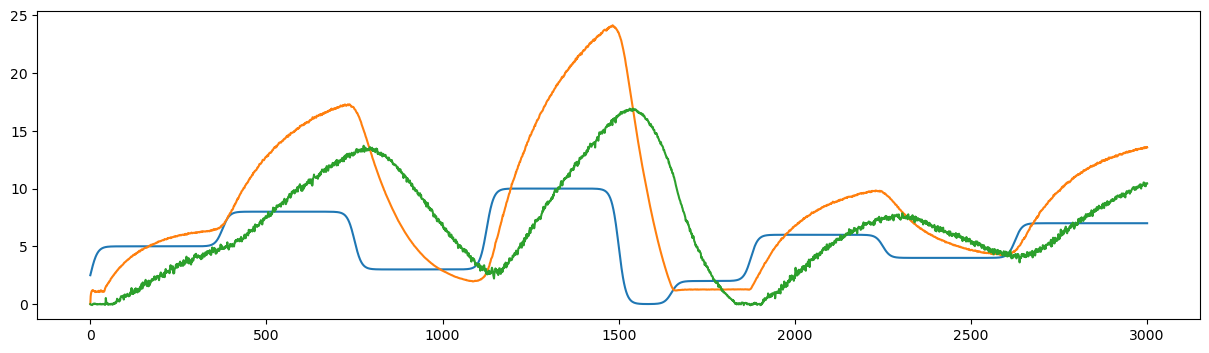

In [17]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
import scipy.signal as signal
from sympy import symbols, pprint
import matplotlib.pyplot as plt
import os
import sys

sys.path.append("..")

from structureSelector import *
from methods.utils.utilities import *

def metrics(y, yest):
    residuo1 = y - yest
    mape = round(np.mean(np.abs(residuo1 / (yest + np.finfo(np.float64).eps))) * 100, 3)
    print('RMSE:', np.sqrt(np.mean(np.square(residuo1))),'\nMSE:', np.mean(np.square(residuo1)), '\nAET:', np.sum(np.abs(residuo1)), '\nMAPE:', str(mape) + '%')
    cc = np.corrcoef(y, yest)
    #print("Correlation pearson:", np.mean(cc))
'''
dataTank = pd.read_csv('../data/coupletanks.csv')
u = np.reshape(np.array(dataTank['u']), (1,-1))
y = np.array(dataTank[['tank1', 'tank2']].T)
xc = y.copy()
'''
mat_content1 = sc.loadmat("../data/ct1e1.mat")
mat_content2 = sc.loadmat("../data/ct1e2.mat")

tanque1 = mat_content1['Tanque1']
tanque2 = mat_content2['Tanque2']

v1 = tanque1['signals'][0][0]['values'][0][0]

v2 = tanque2['signals'][0][0]['values'][0][0]

input = pd.read_csv('../data/einput.csv')
t = input['t']
u = np.array(input['v']).reshape((1,-1))
y = np.vstack((v1.T, v2.T))
xc = y.copy()

plt.figure(figsize=(15,4))
plt.plot(u.T)
plt.plot(y.T)
plt.show()

## com ruido

5 (5, 3000)
[] 0 [1] 17.817137895699556
[] 1 [Y1.1] 9.82221522405007
[] 2 [Y2.1] 64.93048029138205
[] 3 [sqrt(Y1.1)] 9.146826988265436
[] 4 [sqrt(Y2.1)] 64.93048029138205
[3] 0 [sqrt(Y1.1) 1] 8.88441694394627
[3] 1 [sqrt(Y1.1) Y1.1] 8.556841045255386
[3] 2 [sqrt(Y1.1) Y2.1] 4.53851215852963
[3] 4 [sqrt(Y1.1) sqrt(Y2.1)] 90.23442662331202
[3, 2] 0 [sqrt(Y1.1) Y2.1 1] 0.28126141905532986
[3, 2] 1 [sqrt(Y1.1) Y2.1 Y1.1] 0.6504525973556106
[3, 2] 4 [sqrt(Y1.1) Y2.1 sqrt(Y2.1)] 0.2955826515306153
[3, 2, 0] 1 [sqrt(Y1.1) Y2.1 1 Y1.1] 0.27270055365384066
[3, 2, 0] 4 [sqrt(Y1.1) Y2.1 1 sqrt(Y2.1)] 0.19379368472046835
[3, 2, 0, 4] 1 [sqrt(Y1.1) Y2.1 1 sqrt(Y2.1) Y1.1] 0.16854843149316245
[sqrt(Y1.1) Y2.1 1 sqrt(Y2.1) Y1.1] [ 0.05957497  0.99896513 -0.04628841 -0.03571082 -0.00246137]
-0.00246136926942042*Y1.1 + 0.998965130147597*Y2.1 + 0.0595749680369507*sqrt(Y1.1) - 0.035710820643468*sqrt(Y2.1) - 0.0462884145420747

Simulação livre
RMSE: 0.4104780961318493 
MSE: 0.16849226740402773 
AET: 921.1

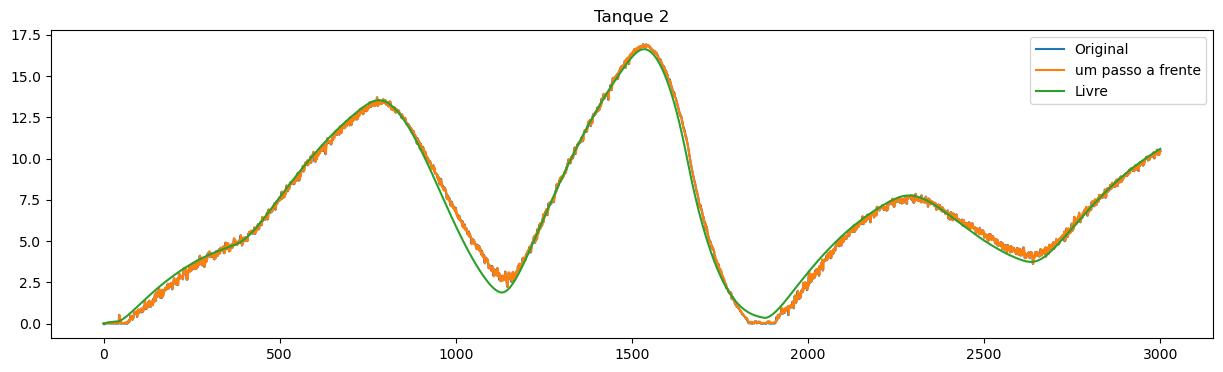

'\n[Y2.1 Y2.2 Y1.1 Y1.2 U1.2] [ 0.65694291  0.33397516  0.0574249  -0.04870856 -0.00104841]\n-0.00104841348835423*U1.2 + 0.0574248975450331*Y1.1 - 0.0487085566436631*Y1.2 + 0.656942908615915*Y2.1 + 0.333975160203195*Y2.2\nSimulação livre\n1 [0]\n--------s:  [Y1.1, Y1.2, Y2.1, Y2.2, U1.0, U1.1, U1.2, U1.3, U1.4]\n\nSimulação livre\nRMSE: 0.33878503918872505 \nMSE: 0.11477530277810598 \nAET: 658.5193702912167 \nMAPE: 4.538%\n\nUm passo a frente\nRMSE: 0.1325874191688393 \nMSE: 0.01757942372185349 \nAET: 247.27216499374433 \nMAPE: 2.738%\n'

In [68]:

#Selecione o tanque 
output = 1  # 0 ou 1

num = [3, 5]
params = []
params.append({'nb':[2,0],'na':[12], 'level':1, 'ynonlinear':[0,0,0,0,0, 0,0,0,0,2], 'unonlinear':[0,0,0,0,0, 0,0,0,0,0], 'root':False, 'delay':8})
params.append({'nb':[1,1],'na':[0], 'level':1, 'ynonlinear':[0,0,0,0,0, 0,0,0,0,1], 'unonlinear':[0,0,0,0,0, 0,0,0,0,0], 'root':False, 'delay':0})

sselector = structureSelector()
#ss = sselector.symbolic_regressors(**params[output])
#vCandidatos = sselector.matrix_candidate(u, y, **params[output], dt=0.1)
ss, vCandidatos = sselector.generate_candidate(u, y[:len(params[output]['nb'])], **params[output])
#print(ss)

pad = max(max(params[output]['nb']), max(params[output]['na']))
#psi, selected  = sselector.frp(vCandidatos.T, y[output, pad:], num[output], 0.0000001)
psi, selected  = sselector.semp(vCandidatos.T, u, y[:len(params[output]['nb'])], params[output]['nb'], params[output]['na'], num[output], ss, output, params[output]['delay'], 0.000000001) #0.0000001
theta = LSM(y[output, pad:], psi)
model = ss[selected]
print(model, theta)

print(model @ theta)

#print(ss)

slivre = sselector.predict(u, y[:len(params[output]['nb'])], theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)
yhat = sselector.oneStepForward(u, y[:len(params[output]['nb'])], theta, ss[selected], params[output]['nb'], params[output]['na'], output, dt=0.1)

print("\nSimulação livre")
metrics(y[output], slivre)
print("\nUm passo a frente")
metrics(y[output], yhat)

plt.figure(figsize=(15,4))
plt.title("Tanque " + str(output+1))
plt.plot(y[output].T, label='Original')
plt.plot(yhat, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.legend()
plt.show()

'''
[Y2.1 Y2.2 Y1.1 Y1.2 U1.2] [ 0.65694291  0.33397516  0.0574249  -0.04870856 -0.00104841]
-0.00104841348835423*U1.2 + 0.0574248975450331*Y1.1 - 0.0487085566436631*Y1.2 + 0.656942908615915*Y2.1 + 0.333975160203195*Y2.2
Simulação livre
1 [0]
--------s:  [Y1.1, Y1.2, Y2.1, Y2.2, U1.0, U1.1, U1.2, U1.3, U1.4]

Simulação livre
RMSE: 0.33878503918872505 
MSE: 0.11477530277810598 
AET: 658.5193702912167 
MAPE: 4.538%

Um passo a frente
RMSE: 0.1325874191688393 
MSE: 0.01757942372185349 
AET: 247.27216499374433 
MAPE: 2.738%
'''

## Sem ruido

5 (5, 2999)
[] 0 [1] 17.790580928961575
[] 1 [Y2.1] 64.88643194308348
[] 2 [Y2.2] 64.86720823816874
[] 3 [sqrt(Y1.1)] 9.131791849888087
[] 4 [sqrt(Y2.1)] 22.229175629320267
adicionado sqrt(Y1.1) 9.131791849888086787 inf
prunning
[3] 0 [sqrt(Y1.1) 1] 8.868155636809831
[3] 1 [sqrt(Y1.1) Y2.1] 5.263208184385224
[3] 2 [sqrt(Y1.1) Y2.2] 5.315562667494936
[3] 4 [sqrt(Y1.1) sqrt(Y2.1)] 90.97493324092312
adicionado Y2.1 5.2632081843852240866 9.131791849888087
prunning
[3, 1] 0 [sqrt(Y1.1) Y2.1 1] 0.1619940095850928
[3, 1] 2 [sqrt(Y1.1) Y2.1 Y2.2] 3.5332407628723614
[3, 1] 4 [sqrt(Y1.1) Y2.1 sqrt(Y2.1)] 0.41883588581841313
adicionado 1 0.1619940095850928019 5.263208184385224
prunning
[3, 1, 0] 2 [sqrt(Y1.1) Y2.1 1 Y2.2] nan
[3, 1, 0] 4 [sqrt(Y1.1) Y2.1 1 sqrt(Y2.1)] 0.10231329932864282
adicionado sqrt(Y2.1) 0.10231329932864281773 0.1619940095850928
prunning
[3, 1, 0, 4] 2 [sqrt(Y1.1) Y2.1 1 sqrt(Y2.1) Y2.2] 93226990191468.2
não adicionado, fim 93226990191468.203125 0.10231329932864282
[sqrt(Y1.

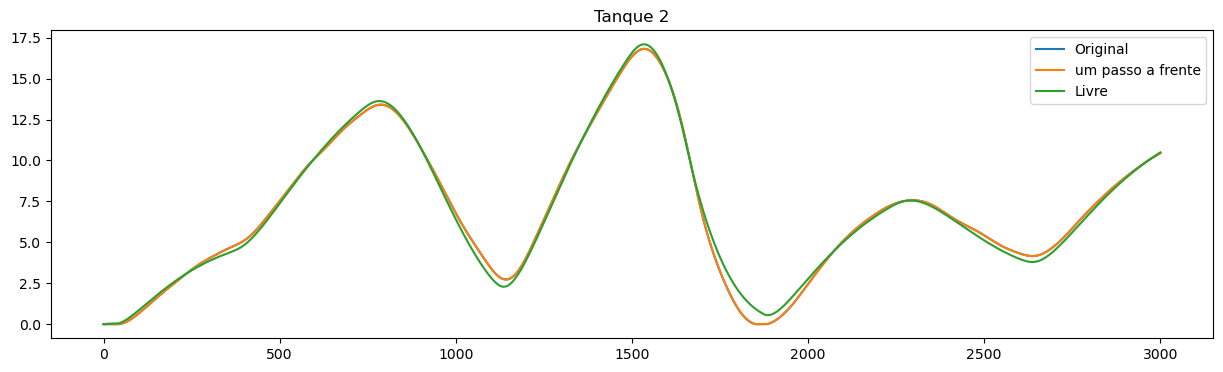

'\n[Y2.1 Y2.2 Y1.1 Y1.2 U1.2] [ 0.65694291  0.33397516  0.0574249  -0.04870856 -0.00104841]\n-0.00104841348835423*U1.2 + 0.0574248975450331*Y1.1 - 0.0487085566436631*Y1.2 + 0.656942908615915*Y2.1 + 0.333975160203195*Y2.2\nSimulação livre\n1 [0]\n--------s:  [Y1.1, Y1.2, Y2.1, Y2.2, U1.0, U1.1, U1.2, U1.3, U1.4]\n\nSimulação livre\nRMSE: 0.33878503918872505 \nMSE: 0.11477530277810598 \nAET: 658.5193702912167 \nMAPE: 4.538%\n\nUm passo a frente\nRMSE: 0.1325874191688393 \nMSE: 0.01757942372185349 \nAET: 247.27216499374433 \nMAPE: 2.738%\n'

In [18]:
wn = 0.1#0.05
b1, a1 = signal.butter(2, wn, 'low')
filtered1 = signal.filtfilt(b1, a1, y[0], padlen=100)

wn = 0.02
b1, a1 = signal.butter(4, wn, 'low')
filtered2 = signal.filtfilt(b1, a1, y[1], padlen=100)
'''
plt.figure(figsize=(15,4))
plt.plot(y[1, 500:1500].T)
plt.plot(filtered2[ 500:1500].T)
plt.show()
'''
#y[0] = filtered1
y[1] = filtered2

#y[y < 0] = 0
#Selecione o tanque 
output = 1  # 0 ou 1

num = [4, 5]
params = []
params.append({'nb':[2],'na':[12], 'level':1, 'ynonlinear':[0,0,0,0,0, 0,0,0,0,2], 'unonlinear':[0,0,0,0,0, 0,0,0,0,0], 'root':False, 'delay':8})
params.append({'nb':[0,2],'na':[0], 'level':1, 'ynonlinear':[0,0,0,0,0, 0,0,0,0,1], 'unonlinear':[0,0,0,0,0, 0,0,0,0,0], 'root':False, 'delay':0})

sselector = structureSelector()
#ss = sselector.symbolic_regressors(**params[output])
#vCandidatos = sselector.matrix_candidate(u, y, **params[output], dt=0.1)
ss, vCandidatos = sselector.generate_candidate(u, y[:len(params[output]['nb'])], **params[output])
#print(ss)

pad = max(max(params[output]['nb']), max(params[output]['na']))
#psi, selected  = sselector.frp(vCandidatos.T, y[output, pad:], num[output], 0.0000001)
psi, selected  = sselector.semp(vCandidatos.T, u, y[:len(params[output]['nb'])], params[output]['nb'], params[output]['na'], num[output], ss, output, params[output]['delay'], 0.000000001) #0.0000001
theta = LSM(y[output, pad:], psi)
model = ss[selected]
print(model, theta)

print(model @ theta)

#print(ss)

slivre = sselector.predict(u, y[:len(params[output]['nb'])], theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)
yhat = sselector.oneStepForward(u, y[:len(params[output]['nb'])], theta, ss[selected], params[output]['nb'], params[output]['na'], output, dt=0.1)

print("\nSimulação livre")
metrics(y[output], slivre)
print("\nUm passo a frente")
metrics(y[output], yhat)

plt.figure(figsize=(15,4))
plt.title("Tanque " + str(output+1))
plt.plot(y[output].T, label='Original')
plt.plot(yhat, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.legend()
plt.show()

'''
[Y2.1 Y2.2 Y1.1 Y1.2 U1.2] [ 0.65694291  0.33397516  0.0574249  -0.04870856 -0.00104841]
-0.00104841348835423*U1.2 + 0.0574248975450331*Y1.1 - 0.0487085566436631*Y1.2 + 0.656942908615915*Y2.1 + 0.333975160203195*Y2.2
Simulação livre
1 [0]
--------s:  [Y1.1, Y1.2, Y2.1, Y2.2, U1.0, U1.1, U1.2, U1.3, U1.4]

Simulação livre
RMSE: 0.33878503918872505 
MSE: 0.11477530277810598 
AET: 658.5193702912167 
MAPE: 4.538%

Um passo a frente
RMSE: 0.1325874191688393 
MSE: 0.01757942372185349 
AET: 247.27216499374433 
MAPE: 2.738%
'''

### plot

[Y2.1 sqrt(Y1.1) 1 sqrt(Y2.1)]


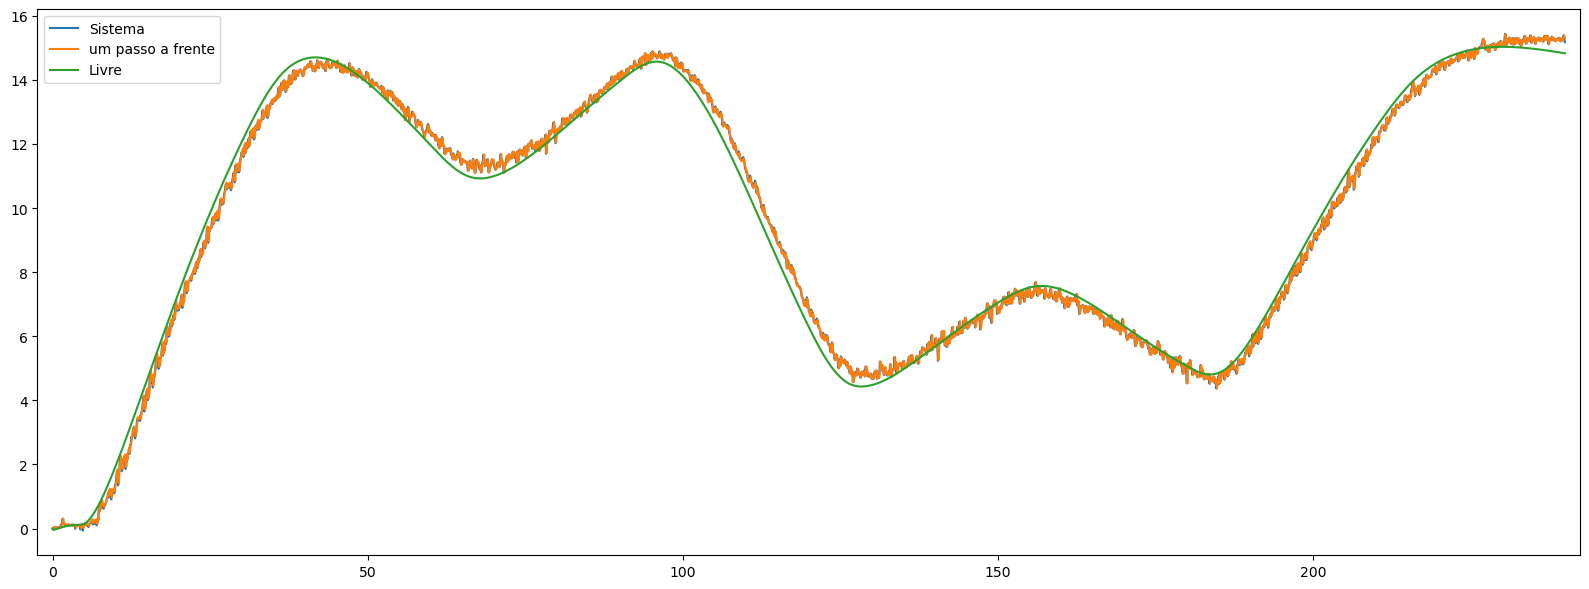

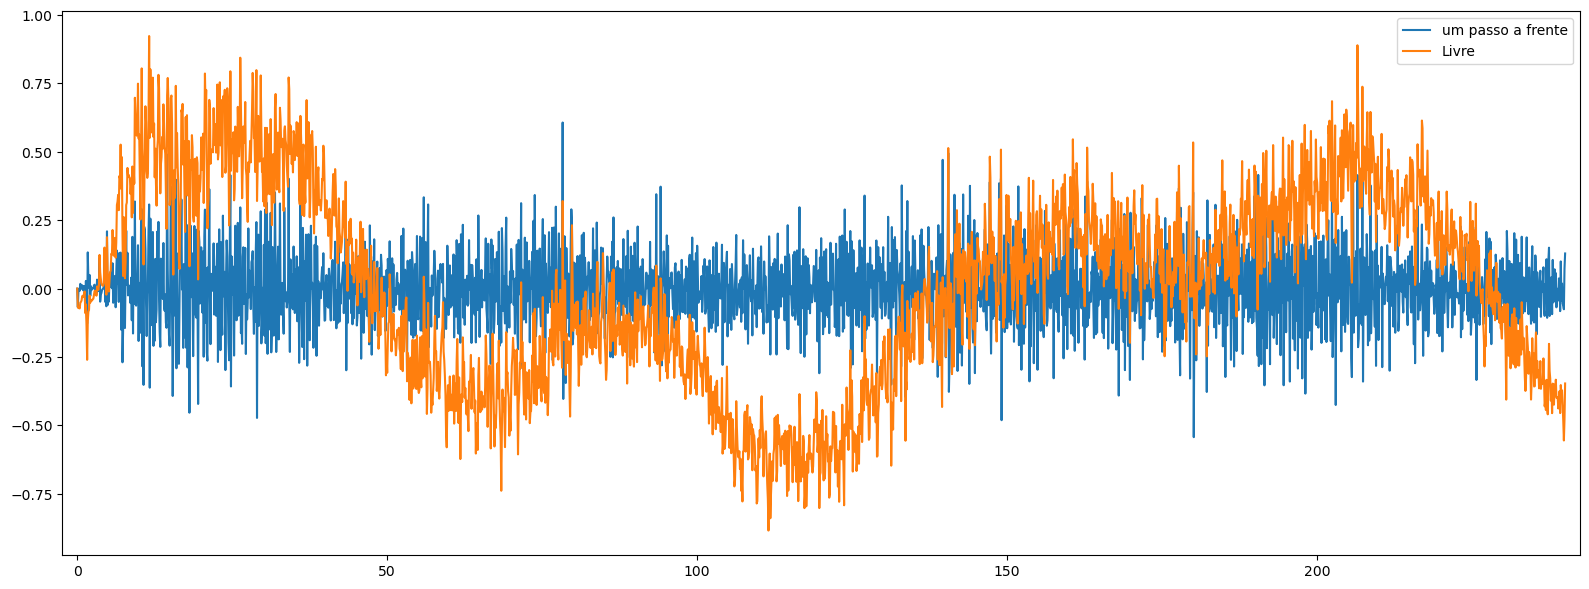

In [15]:
print(model)
l = 1.5
t = np.arange(0, y[0].shape[0], 1) * 0.1
plt.figure(figsize=(16, 6))
plt.plot(t, xc[output].T, label='Sistema', linewidth=l)
plt.plot(t, yhat, label='um passo a frente', linewidth=l)
plt.plot(t, slivre, label='Livre', linewidth=l)
plt.margins(x=0.01)
plt.legend()
plt.tight_layout() 
#plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/tank' + str(1 + output) + 'Est.png')

plt.figure(figsize=(16, 6))
plt.plot(t, yhat - xc[output].T, label='um passo a frente', linewidth=l)
plt.plot(t, slivre - xc[output].T, label='Livre', linewidth=l)
plt.margins(x=0.01)
plt.legend()
plt.tight_layout() 
#plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/tank' + str(1 + output) + 'Est.png')

plt.show()

## Validação

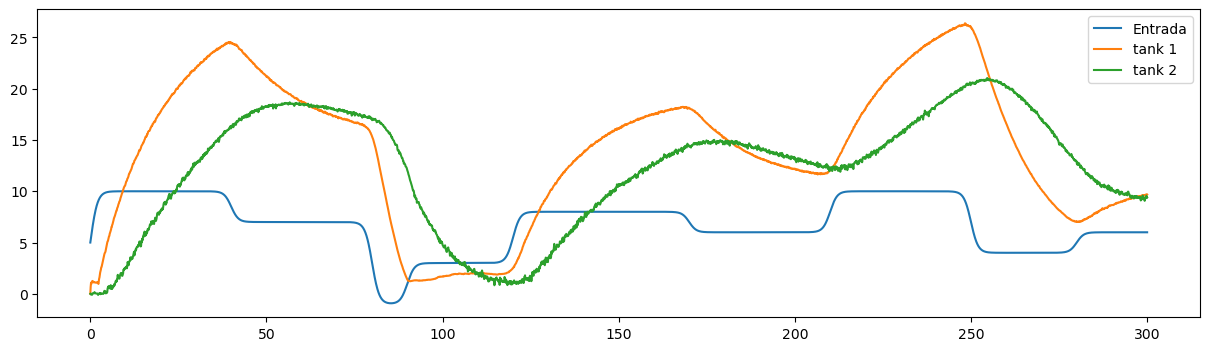

In [19]:

mat_content1 = sc.loadmat("../data/ct1x1.mat")
mat_content2 = sc.loadmat("../data/ct1x2.mat")

tanque1 = mat_content1['Tanque1']
tanque2 = mat_content2['Tanque2']

t1 = tanque1['time'][0][0]
v1 = tanque1['signals'][0][0]['values'][0][0]

t2 = tanque2['time'][0][0]
v2 = tanque2['signals'][0][0]['values'][0][0]

input = pd.read_csv('../data/xinput.csv')
t = input['t']
uVal = np.array(input['v']).reshape((1,-1))

plt.figure(figsize=(15,4))
plt.plot(t, uVal.T, label='Entrada')
plt.plot(t1, v1, label="tank 1")
plt.plot(t2, v2, label="tank 2")
plt.legend()
plt.show()


(2, 3001)
Modelo selecionado:
0.997395973596022⋅Y2.1 + 0.041838662278924⋅sqrt(Y1.1) - 0.023033426152809⋅sqrt
(Y2.1) - 0.0386702349181753


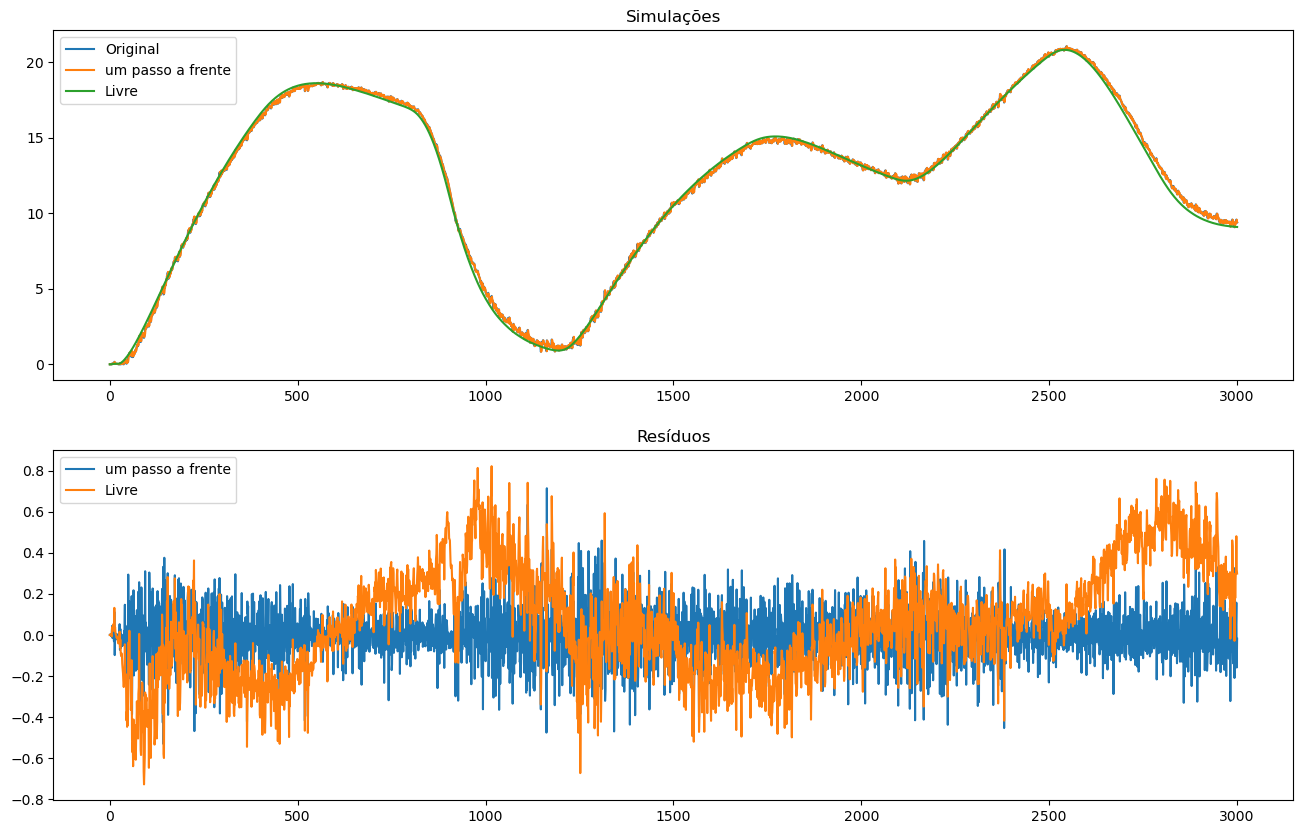


Simulação livre
RMSE: 0.2686594062221805 
MSE: 0.0721778765516546 
AET: 642.5773851545171 
MAPE: 4.903%

Um passo a frente
RMSE: 0.13146834061086124 
MSE: 0.01728392458297343 
AET: 299.4077607093285 
MAPE: 3.066%


In [20]:
v1[v1 < 0] = 0
v2[v2 < 0] = 0
#v2[:100] = 0
yVal = np.vstack((v1.T, v2.T))
print(yVal.shape)
z = np.zeros(yVal.shape)
valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output)
yhat = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output)

print("Modelo selecionado:")
pprint( model @ theta)

f, ax = plt.subplots(2,1, figsize=[16,10])

ax[0].plot(yVal[output].T, label='Original')
ax[0].plot(yhat, label='um passo a frente')
ax[0].plot(valLivre, label='Livre')
ax[0].set_title("Simulações")
ax[0].legend()

ax[1].plot(yVal[output].T - yhat, label='um passo a frente')
ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].set_title("Resíduos")
ax[1].legend()
plt.show()

print("\nSimulação livre")
metrics(yVal[output].T, valLivre)
print("\nUm passo a frente")
metrics(yVal[output].T, yhat)

## polinomial

28 (28, 2999)
[] 0 [1] 17.790580928961575
[] 1 [Y1.1] 9.807119691657578
[] 2 [Y1.2] 9.651927353963337
[] 3 [Y2.1] 64.88640980859337
[] 4 [Y2.2] 64.86719249241706
[] 5 [U1.1] 25.440067176472162
[] 6 [U1.2] 25.305463581267396
[] 7 [Y1.1**2] 20.20400435217257
[] 8 [Y1.1*Y1.2] 20.126843684315354
[] 9 [Y1.1*Y2.1] 64.93174390585686
[] 10 [Y1.1*Y2.2] 64.93174390585494
[] 11 [U1.1*Y1.1] 25.56576724057546
[] 12 [U1.2*Y1.1] 25.46294695531077
[] 13 [Y1.2**2] 20.050442558045503
[] 14 [Y1.2*Y2.1] 64.93174390586948
[] 15 [Y1.2*Y2.2] 64.93174390587211
[] 16 [U1.1*Y1.2] 25.49454166533269
[] 17 [U1.2*Y1.2] 25.39162610027472
[] 18 [Y2.1**2] 64.93174390586941
[] 19 [Y2.1*Y2.2] 64.93174390586935
[] 20 [U1.1*Y2.1] 64.931743905963
[] 21 [U1.2*Y2.1] 64.93174390594498
[] 22 [Y2.2**2] 64.93174390586925
[] 23 [U1.1*Y2.2] 64.93174390669328
[] 24 [U1.2*Y2.2] 64.9317439065888
[] 25 [U1.1**2] 31.27006088463392
[] 26 [U1.1*U1.2] 31.188573028419757
[] 27 [U1.2**2] 31.1063014266324
adicionado Y1.2 9.651927353963337453

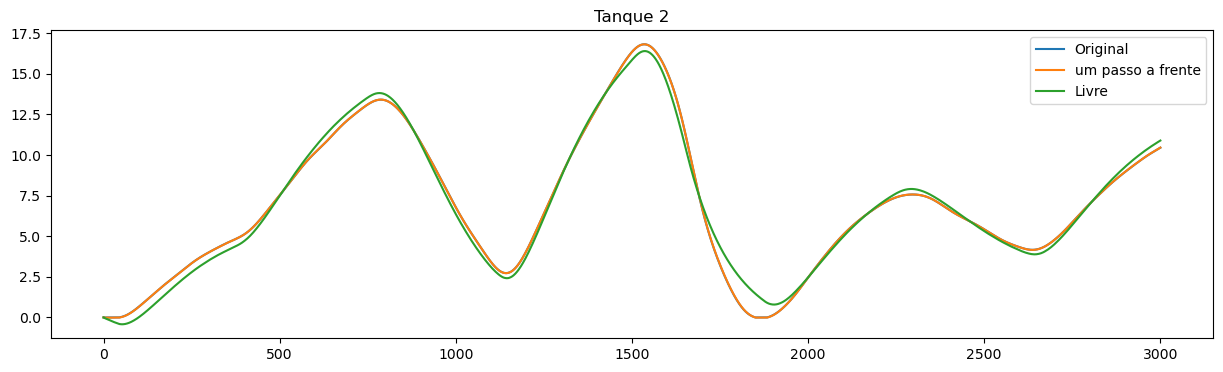

In [21]:
output = 1  # 0 ou 1

num = [4, 5]
params = []
params.append({'nb':[2],'na':[12], 'level':1, 'ynonlinear':[0,0,0,0,0], 'unonlinear':[0,0,0,0,0], 'root':False, 'delay':8})
params.append({'nb':[2,2],'na':[2], 'level':2, 'ynonlinear':[0,0,0,0,0], 'unonlinear':[0,0,0,0,0], 'root':False, 'delay':0})

sselector = structureSelector()
#ss = sselector.symbolic_regressors(**params[output])
#vCandidatos = sselector.matrix_candidate(u, y, **params[output], dt=0.1)
ss, vCandidatos = sselector.generate_candidate(u, y[:len(params[output]['nb'])], **params[output])
#print(ss)

pad = max(max(params[output]['nb']), max(params[output]['na']))
#psi, selected  = sselector.frp(vCandidatos.T, y[output, pad:], num[output], 0.0000001)
psi, selected  = sselector.semp(vCandidatos.T, u, y[:len(params[output]['nb'])], params[output]['nb'], params[output]['na'], num[output], ss, output, params[output]['delay'], 0.000000001) #0.0000001
theta = LSM(y[output, pad:], psi)
model = ss[selected]
print(model, theta)

print(model @ theta)

#print(ss)

slivre = sselector.predict(u, y[:len(params[output]['nb'])], theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)
yhat = sselector.oneStepForward(u, y[:len(params[output]['nb'])], theta, ss[selected], params[output]['nb'], params[output]['na'], output, dt=0.1)

print("\nSimulação livre")
metrics(y[output], slivre)
print("\nUm passo a frente")
metrics(y[output], yhat)

plt.figure(figsize=(15,4))
plt.title("Tanque " + str(output+1))
plt.plot(y[output].T, label='Original')
plt.plot(yhat, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.legend()
plt.show()

(2, 3001)
Modelo selecionado:
                          2                            2                      
- 8.53049678105178e-5⋅U1.2  - 0.000180199430693789⋅Y1.2  + 0.0115064048727874⋅

                                                 
Y1.2 + 0.992271781518319⋅Y2.1 - 0.021635785042856


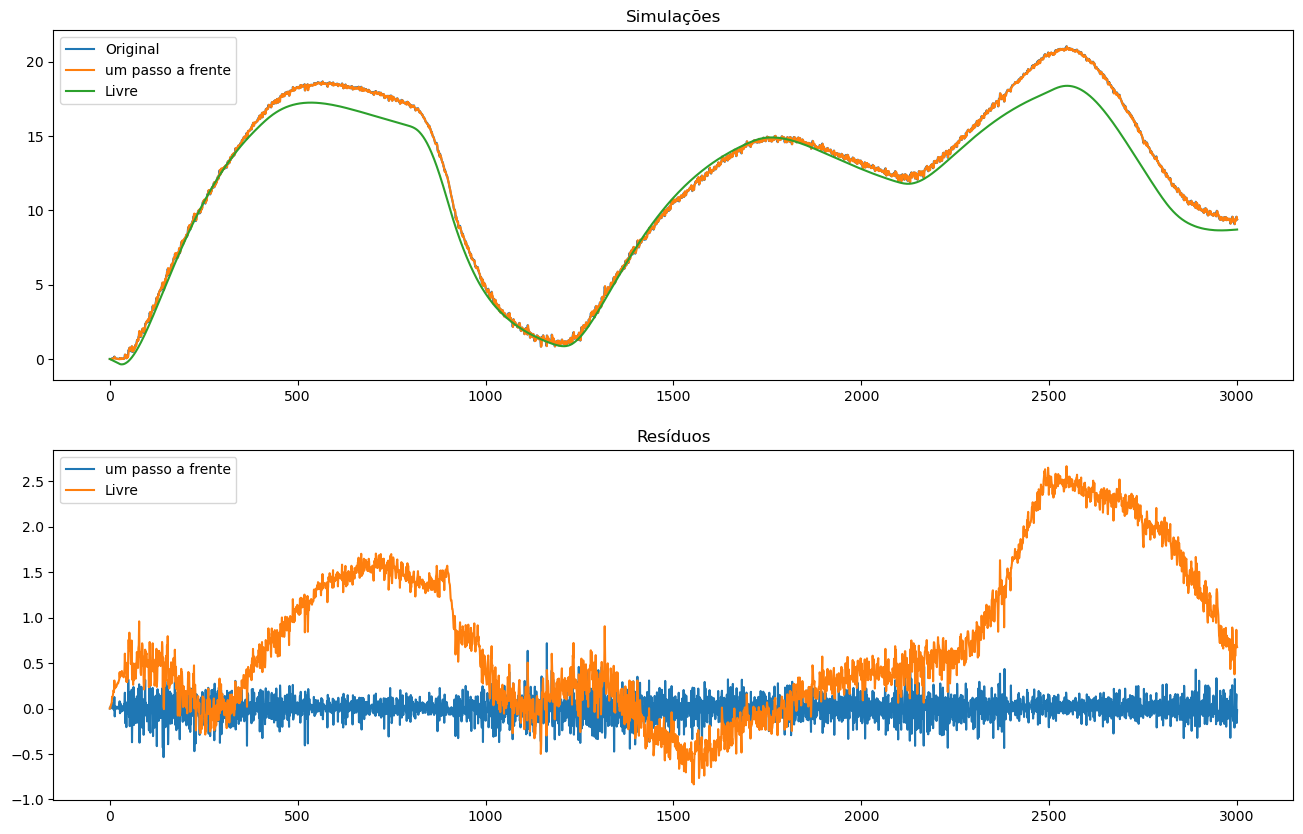


Simulação livre
RMSE: 1.1137740043463764 
MSE: 1.2404925327577623 
AET: 2519.2644140672164 
MAPE: 128.937%

Um passo a frente
RMSE: 0.13178910123979393 
MSE: 0.017368367205592653 
AET: 300.8697155402185 
MAPE: 4.047%


In [22]:

mat_content1 = sc.loadmat("../data/ct1x1.mat")
mat_content2 = sc.loadmat("../data/ct1x2.mat")

tanque1 = mat_content1['Tanque1']
tanque2 = mat_content2['Tanque2']

t1 = tanque1['time'][0][0]
v1 = tanque1['signals'][0][0]['values'][0][0]

t2 = tanque2['time'][0][0]
v2 = tanque2['signals'][0][0]['values'][0][0]

input = pd.read_csv('../data/xinput.csv')
t = input['t']
uVal = np.array(input['v']).reshape((1,-1))

v1[v1 < 0] = 0
v2[v2 < 0] = 0
#v2[:100] = 0
yVal = np.vstack((v1.T, v2.T))
print(yVal.shape)
z = np.zeros(yVal.shape)
valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output)
yhat = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output)

print("Modelo selecionado:")
pprint( model @ theta)

f, ax = plt.subplots(2,1, figsize=[16,10])

ax[0].plot(yVal[output].T, label='Original')
ax[0].plot(yhat, label='um passo a frente')
ax[0].plot(valLivre, label='Livre')
ax[0].set_title("Simulações")
ax[0].legend()

ax[1].plot(yVal[output].T - yhat, label='um passo a frente')
ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].set_title("Resíduos")
ax[1].legend()
plt.show()

print("\nSimulação livre")
metrics(yVal[output].T, valLivre)
print("\nUm passo a frente")
metrics(yVal[output].T, yhat)
